In [1]:
import sys
import os
import numpy as np

import librosa.display
import librosa 
import IPython.display as ipd

from scipy.io import wavfile
import scipy.fftpack as fftpack

import madmom
from madmom.audio.spectrogram import Spectrogram

import matplotlib.pyplot as plt

sys.path.append('../')

In [3]:
import essentia

ModuleNotFoundError: No module named 'essentia'

## Load audio example

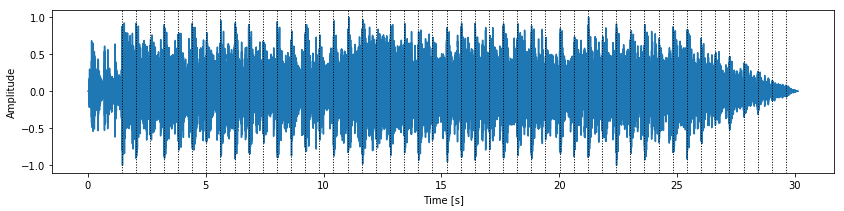

In [6]:
example = '../data/audio/Ballroom/Albums-Latin_Jam3-06.wav'
annotations_file = '../data/annotations/Ballroom/Albums-Latin_Jam3-06.beats'

# Load Wav File
sample_rate, signal = wavfile.read(example, mmap=True)

# Normalize
signal = signal / np.max(np.abs(signal))


time_vector = np.linspace(0, len(signal)/sample_rate, len(signal))
annotations = madmom.io.load_onsets(annotations_file)

plt.figure(figsize=(14,3))
plt.plot(time_vector, signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude');

for ann in annotations:
    plt.axvline(x=ann, color='k', linestyle=':', linewidth=1)

ipd.Audio(example)

In [19]:
spec = Spectrogram(example)

oss = madmom.features.onsets.superflux(spec, diff_frames=None, diff_max_bins=3)

oss = oss / np.mean(oss)

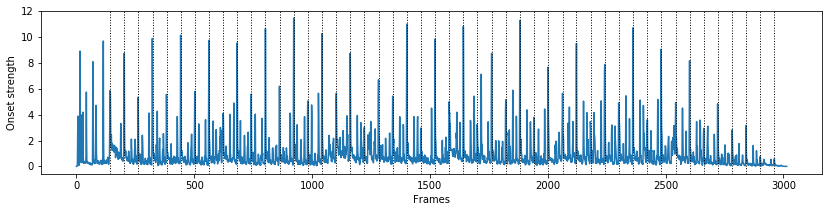

In [20]:
plt.figure(figsize=(14,3))
plt.plot(oss)
plt.xlabel('Frames')
plt.ylabel('Onset strength');

for ann in annotations:
    plt.axvline(x=ann*100, color='k', linestyle=':', linewidth=1)

In [36]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

from numpy.fft import fft, ifft

def periodic_corr(x, y):
    """Periodic correlation, implemented using the FFT.

    x and y must be real sequences with the same length.
    """
    return ifft(fft(x) * fft(y).conj()).real

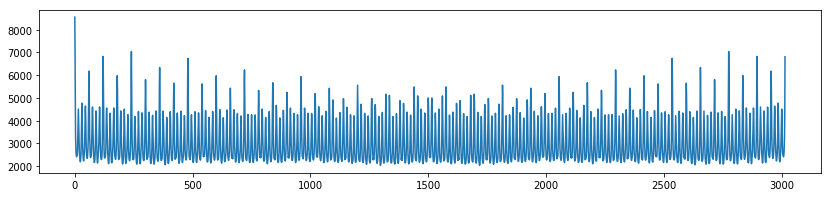

In [37]:
ac = periodic_corr(oss, oss)

plt.figure(figsize=(14,3))
plt.plot(ac)